In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('housepricedata.csv')

In [4]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [5]:
dataset = df.values

In [6]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [8]:
X = dataset[:,0:10]
Y = dataset[:,10]

In [9]:
from sklearn import preprocessing

In [10]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [11]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [14]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [15]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [16]:
from keras.models import Sequential
from keras.layers import Dense

In [17]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [18]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [19]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 15ms/step - loss: 0.6747 - accuracy: 0.6640 - val_loss: 0.6634 - val_accuracy: 0.6941
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6659 - accuracy: 0.6693 - val_loss: 0.6557 - val_accuracy: 0.7078
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6621 - accuracy: 0.6776 - val_loss: 0.6487 - val_accuracy: 0.7169
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6523 - accuracy: 0.7137 - val_loss: 0.6422 - val_accuracy: 0.7260
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6482 - accuracy: 0.7304 - val_loss: 0.6358 - val_accuracy: 0.7489
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6380 - accuracy: 0.7575 - val_loss: 0.6293 - val_accuracy: 0.7717
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6372 - accuracy: 0.7975 - val_loss: 0.6219 - val_accuracy: 0.7945
Epoch 8/100


In [20]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 2ms/step - loss: 0.2945 - accuracy: 0.8813


0.8812785148620605

In [21]:
import matplotlib.pyplot as plt

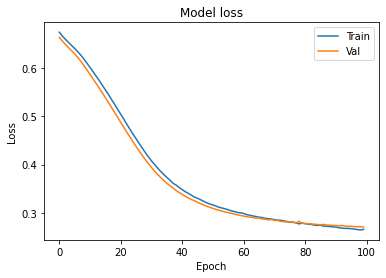

In [22]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

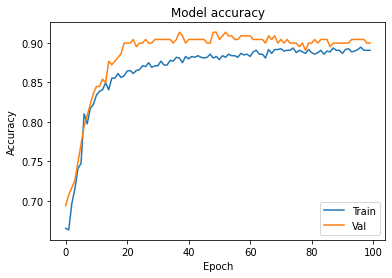

In [25]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [26]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [28]:
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 41ms/step - loss: 0.5504 - accuracy: 0.6975 - val_loss: 0.3116 - val_accuracy: 0.8858
Epoch 2/100
32/32 [==============================] - 1s 35ms/step - loss: 0.3151 - accuracy: 0.8750 - val_loss: 0.3275 - val_accuracy: 0.9041
Epoch 3/100
32/32 [==============================] - 1s 36ms/step - loss: 0.3185 - accuracy: 0.8781 - val_loss: 0.3064 - val_accuracy: 0.8813
Epoch 4/100
32/32 [==============================] - 1s 35ms/step - loss: 0.2990 - accuracy: 0.8745 - val_loss: 0.3172 - val_accuracy: 0.8950
Epoch 5/100
32/32 [==============================] - 1s 35ms/step - loss: 0.2958 - accuracy: 0.8788 - val_loss: 0.3594 - val_accuracy: 0.9041
Epoch 6/100
32/32 [==============================] - 1s 35ms/step - loss: 0.2982 - accuracy: 0.8727 - val_loss: 0.3440 - val_accuracy: 0.8858
Epoch 7/100
32/32 [==============================] - 1s 35ms/step - loss: 0.2214 - accuracy: 0.9128 - val_loss: 0.3255 - val_accuracy: 0.9087
Epoch 

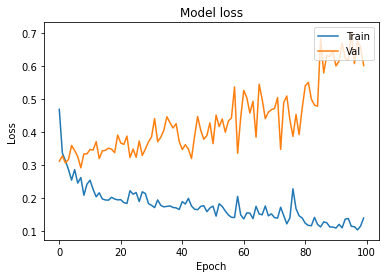

In [29]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

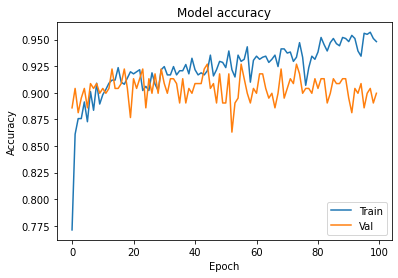

In [32]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [33]:
from keras.layers import Dropout
from keras import regularizers

In [34]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [35]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [36]:
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 53ms/step - loss: 21.1179 - accuracy: 0.5641 - val_loss: 3.8744 - val_accuracy: 0.8767
Epoch 2/100
32/32 [==============================] - 1s 46ms/step - loss: 2.5104 - accuracy: 0.8032 - val_loss: 0.6851 - val_accuracy: 0.8447
Epoch 3/100
32/32 [==============================] - 1s 46ms/step - loss: 0.6925 - accuracy: 0.8054 - val_loss: 0.4861 - val_accuracy: 0.9087
Epoch 4/100
32/32 [==============================] - 1s 45ms/step - loss: 0.5587 - accuracy: 0.8487 - val_loss: 0.4620 - val_accuracy: 0.8950
Epoch 5/100
32/32 [==============================] - 1s 45ms/step - loss: 0.5062 - accuracy: 0.8523 - val_loss: 0.4533 - val_accuracy: 0.8995
Epoch 6/100
32/32 [==============================] - 1s 45ms/step - loss: 0.4790 - accuracy: 0.8812 - val_loss: 0.4520 - val_accuracy: 0.9041
Epoch 7/100
32/32 [==============================] - 1s 45ms/step - loss: 0.4663 - accuracy: 0.8896 - val_loss: 0.4693 - val_accuracy: 0.8813
Epoch

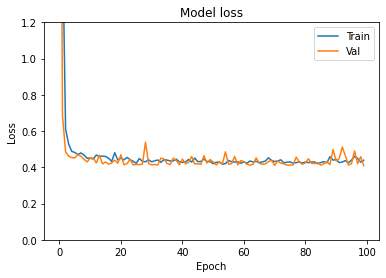

In [37]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

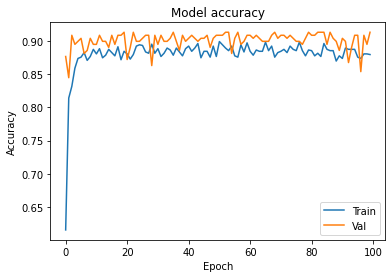

In [40]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()